
<font color="#C71585"> </font>
# Statitstical Analysis of NASA M6 
#### ** Description of NASA M6 key statistics 
#### ** Correlation Analysis of Intensity Indicators, _frp, brightness, bright_t31_ 
#### ** A peak into the distribution of 'frp', _an indicator of fire intensity_:   https://feer.gsfc.nasa.gov/projects/emissions/
#### ** Correlation Analysis of Intensity and Emission: https://www.sciencedirect.com/science/article/pii/S1352231019303164
#### ** Heatmap of fire Intensity over the United States 
#### ** Correlation Analysis of Intensity and Fire Size 

In [2]:
# Numpy = Numeric Computing
import numpy as np
# MatPlotLib = classic Python math plotting library
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.style as stl
# Pandas = Python Data Analysis, home of the DataFrame
import pandas as pd
# Seaborn = Statistical plotting built on top of MatPlotLib
import seaborn as sns
from sklearn import preprocessing

sns.set(style="ticks", color_codes=True)

# Tell MatPlotLib to draw plots inline with the code outputs
%matplotlib inline

# If you have a Mac or other high-res display you can include this:
%config InlineBackend.figure_format = 'retina'

### <font color="#C71585"> Load Data </font>
### Load Data

In [4]:
# NASA M6 Dataset 
M6df = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/fire_archive_M6_110066.csv')

In [5]:
# Set Month and Year
M6df['month'] = pd.DatetimeIndex(M6df['acq_date']).month
M6df['year'] = pd.DatetimeIndex(M6df['acq_date']).year

In [3]:
# NASA M6 and USDA Fires Grouped by State Dataset
NASAgroupedUSDA = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/GroupedConnectedNASA-USDA.csv')

In [4]:
# NASA M6 and USDA Fires Combined Dataset
NASA_USDA = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/ConnectedNASA-USDA.csv')

In [96]:
pd.options.display.float_format = '{:.5f}'.format

### <font color="#C71585"> Description of NASA M6 key statistics  </font>
### Description of NASA M6 key statistics

In [97]:
M6df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000
mean,40.08462,-107.36341,325.30246,1.61535,1.21272,1656.28663,68.02787,6.20496,295.38018,65.40101,0.08680
std,11.24505,22.49238,23.46184,0.81869,0.24961,505.00190,22.93650,0.02172,9.50356,199.20439,0.40986
min,18.93250,-173.96370,300.00000,1.00000,1.00000,0.00000,0.00000,6.20000,264.30000,-59.20000,0.00000
25%,32.62270,-119.93710,310.30000,1.10000,1.00000,1626.00000,54.00000,6.20000,289.80000,11.00000,0.00000
50%,37.05290,-99.06825,318.90000,1.30000,1.10000,1838.00000,69.00000,6.20000,295.10000,22.70000,0.00000
75%,44.76070,-89.80830,332.60000,1.90000,1.30000,1947.00000,86.00000,6.20000,300.30000,53.10000,0.00000
max,70.45650,-67.00420,506.50000,4.80000,2.00000,2359.00000,100.00000,6.30000,400.10000,14376.50000,3.00000


In [98]:
pd.reset_option('^display.', silent=True)

### <font color="#C71585"> Pairplot of key intensity indicators  </font>
### Pairplot of key intensity indicators

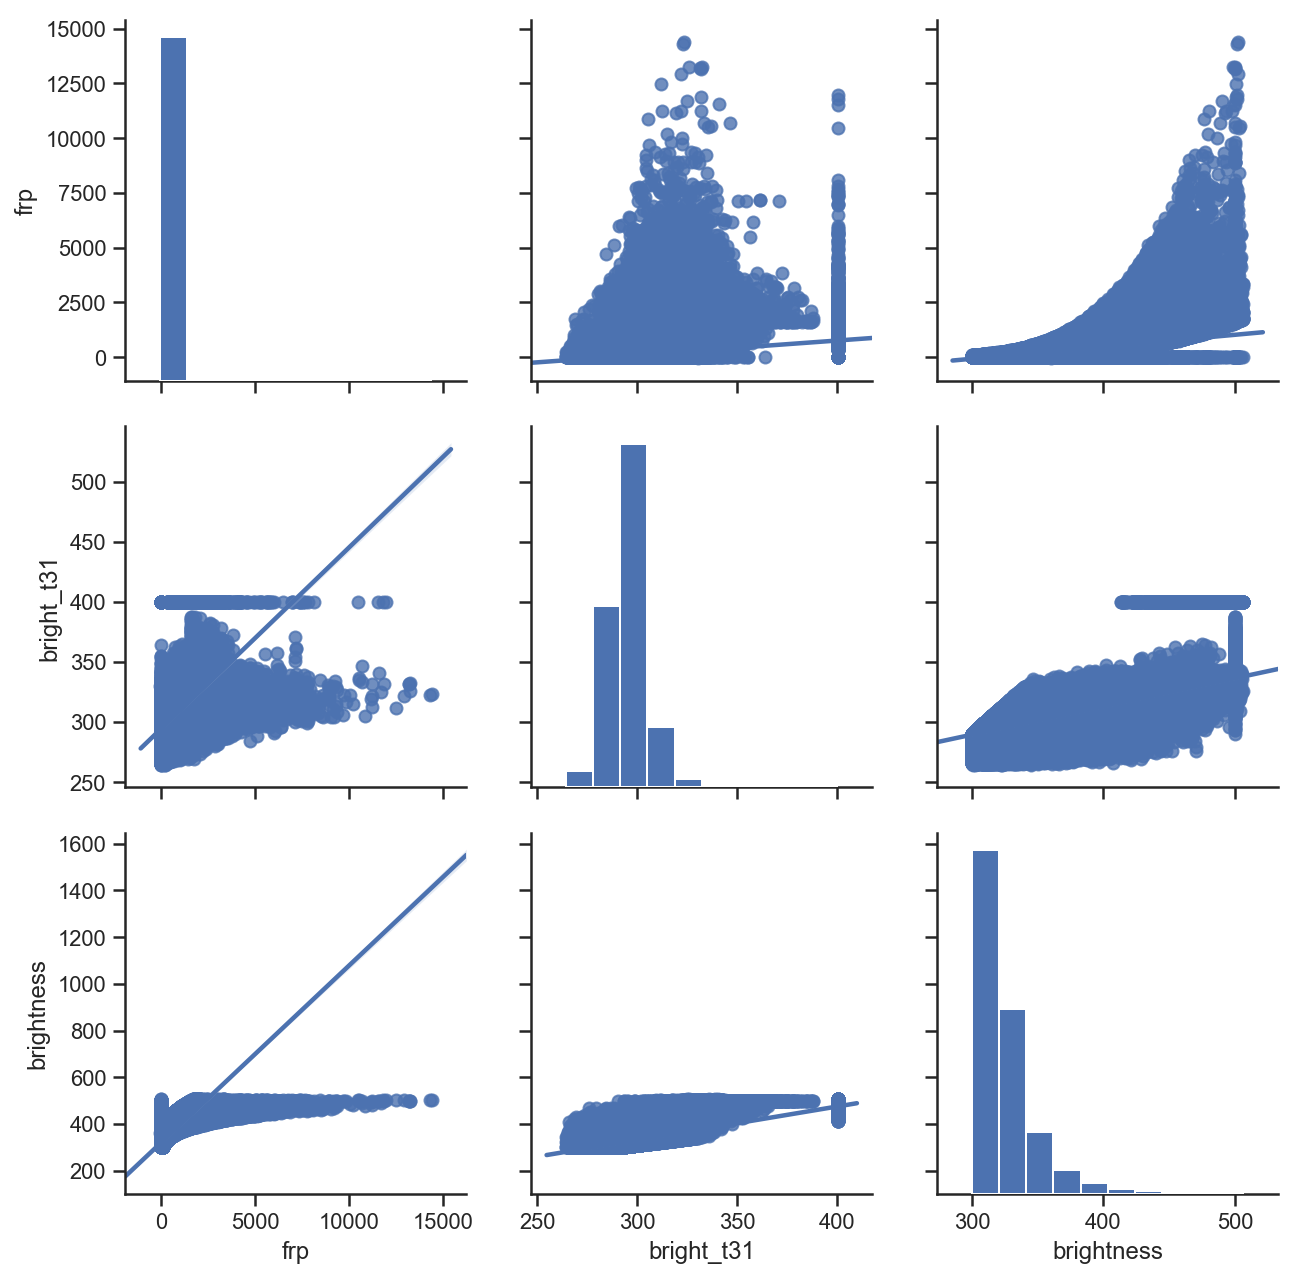

In [217]:
g = sns.pairplot(M6df, height=3, vars=['frp','bright_t31','brightness'], kind="reg")

### <font color="#C71585"> Correlation Analysis of key Intensity Indicators </font>
### Correlation Analysis of key Intensity Indicators

In [33]:
# Correlation Analysis of key intensity indicators
x_values = M6df['brightness']
y_values = M6df['frp']
z_values = M6df['bright_t31']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of Brightness and FRP: {r_squared1:.9f}")
print(f"R2 Correlation of Brightness and Bright_t31: {r_squared2:.9f}")
print(f"R2 Correlation of FRP and Bright_t31: {r_squared3:.9f}")

R2 Correlation of Brightness and FRP: 0.415403183
R2 Correlation of Brightness and Bright_t31: 0.335916857
R2 Correlation of FRP and Bright_t31: 0.100193615


- <font color="#C71585"> R2 Correlation of Brightness and FRP: 0.415403183 </font> R2 Correlation of Brightness and FRP: 0.415403183
- <font color="#C71585"> R2 Correlation of Brightness and Bright_t31: 0.335916857 </font> R2 Correlation of Brightness and Bright_t31: 0.335916857
- <font color="#C71585"> R2 Correlation of FRP and Bright_t31: 0.100193615 </font> R2 Correlation of FRP and Bright_t31: 0.100193615
- <font color="#C71585"> There is a strong linear relationship between "Brightness and Bright_t31". </font> There is a strong linear relationship between "Brightness and Bright_t31".
- <font color="#C71585"> "Brightness" correlates with "FRP" in an exponential manner. </font> "Brightness" correlates with "FRP" in an exponential manner.

### <font color="#C71585"> Pairplot of key intensity indicators separated by Day and Night </font>
### Pairplot of key intensity indicators separated by Day and Night

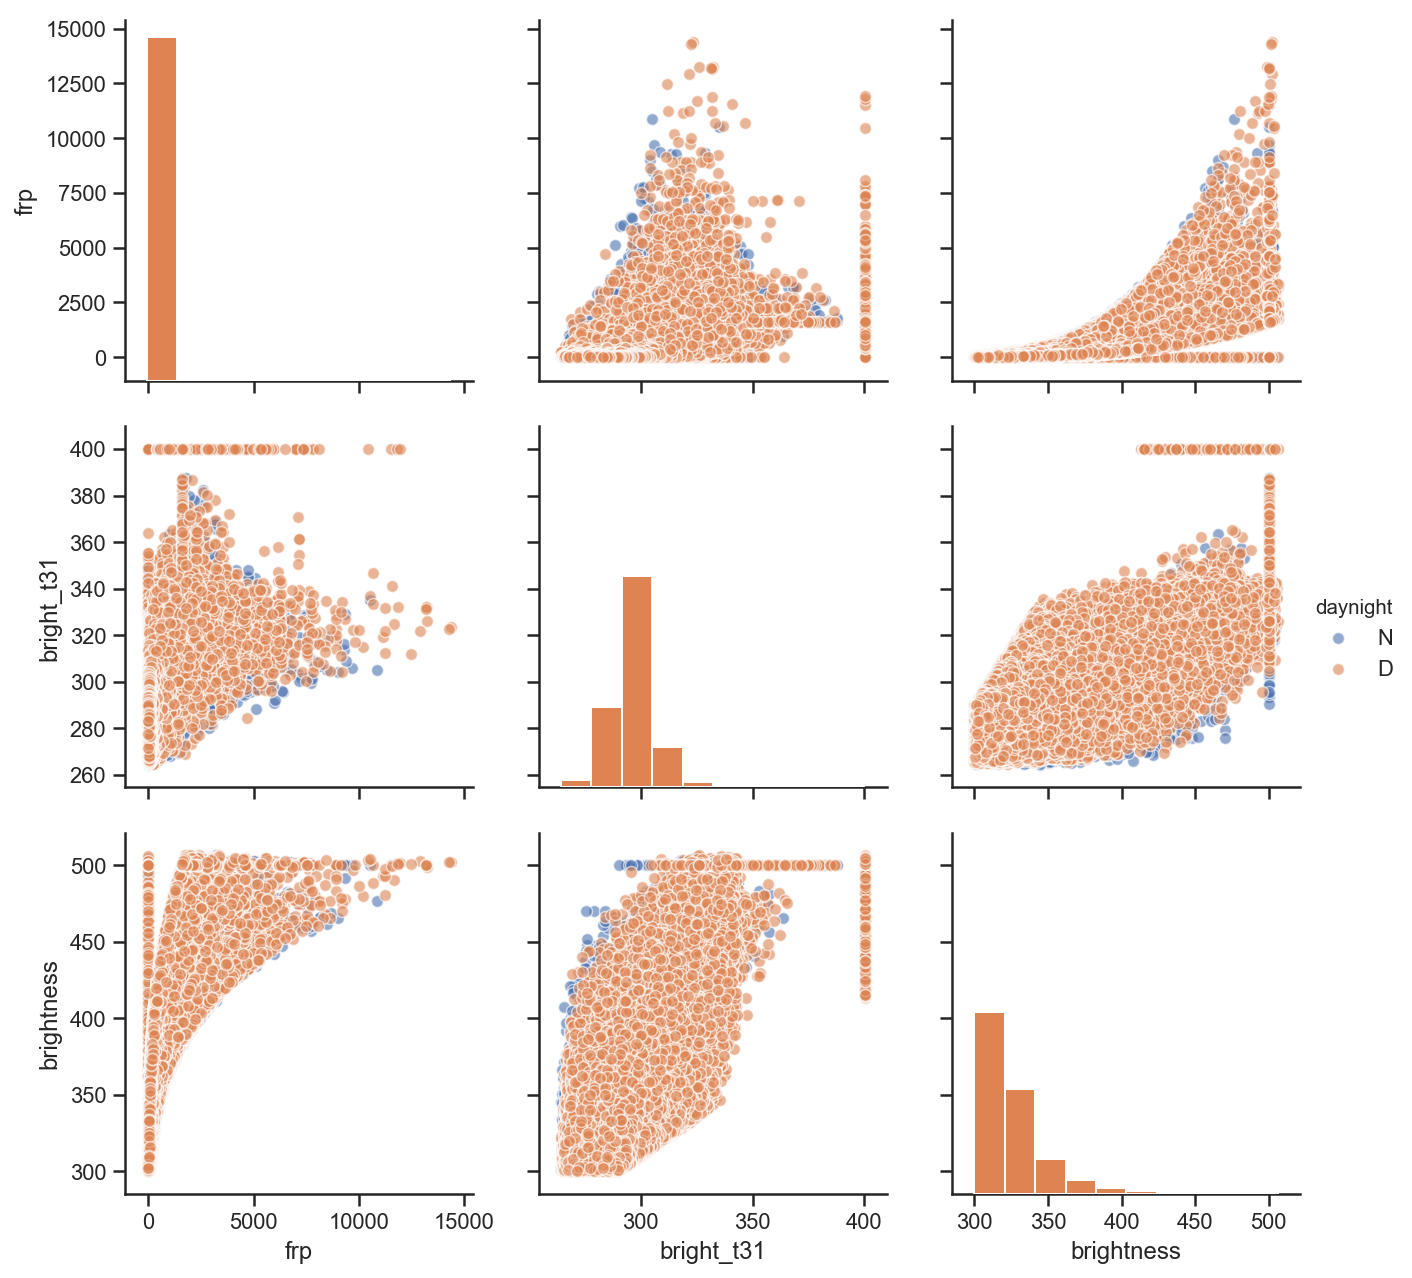

In [35]:
g = sns.pairplot(M6df, height=3, diag_kind="hist",
                 vars=['frp','bright_t31','brightness'], hue="daynight", plot_kws = {'alpha': 0.6})

### <font color="#C71585"> Boxplot of key intensity indicators  </font>
### Boxplot of key intensity indicators

In [30]:
selected_frp = M6df[M6df['frp'] < 500]

In [193]:
selected_M6df = M6df[['frp','brightness','bright_t31']]

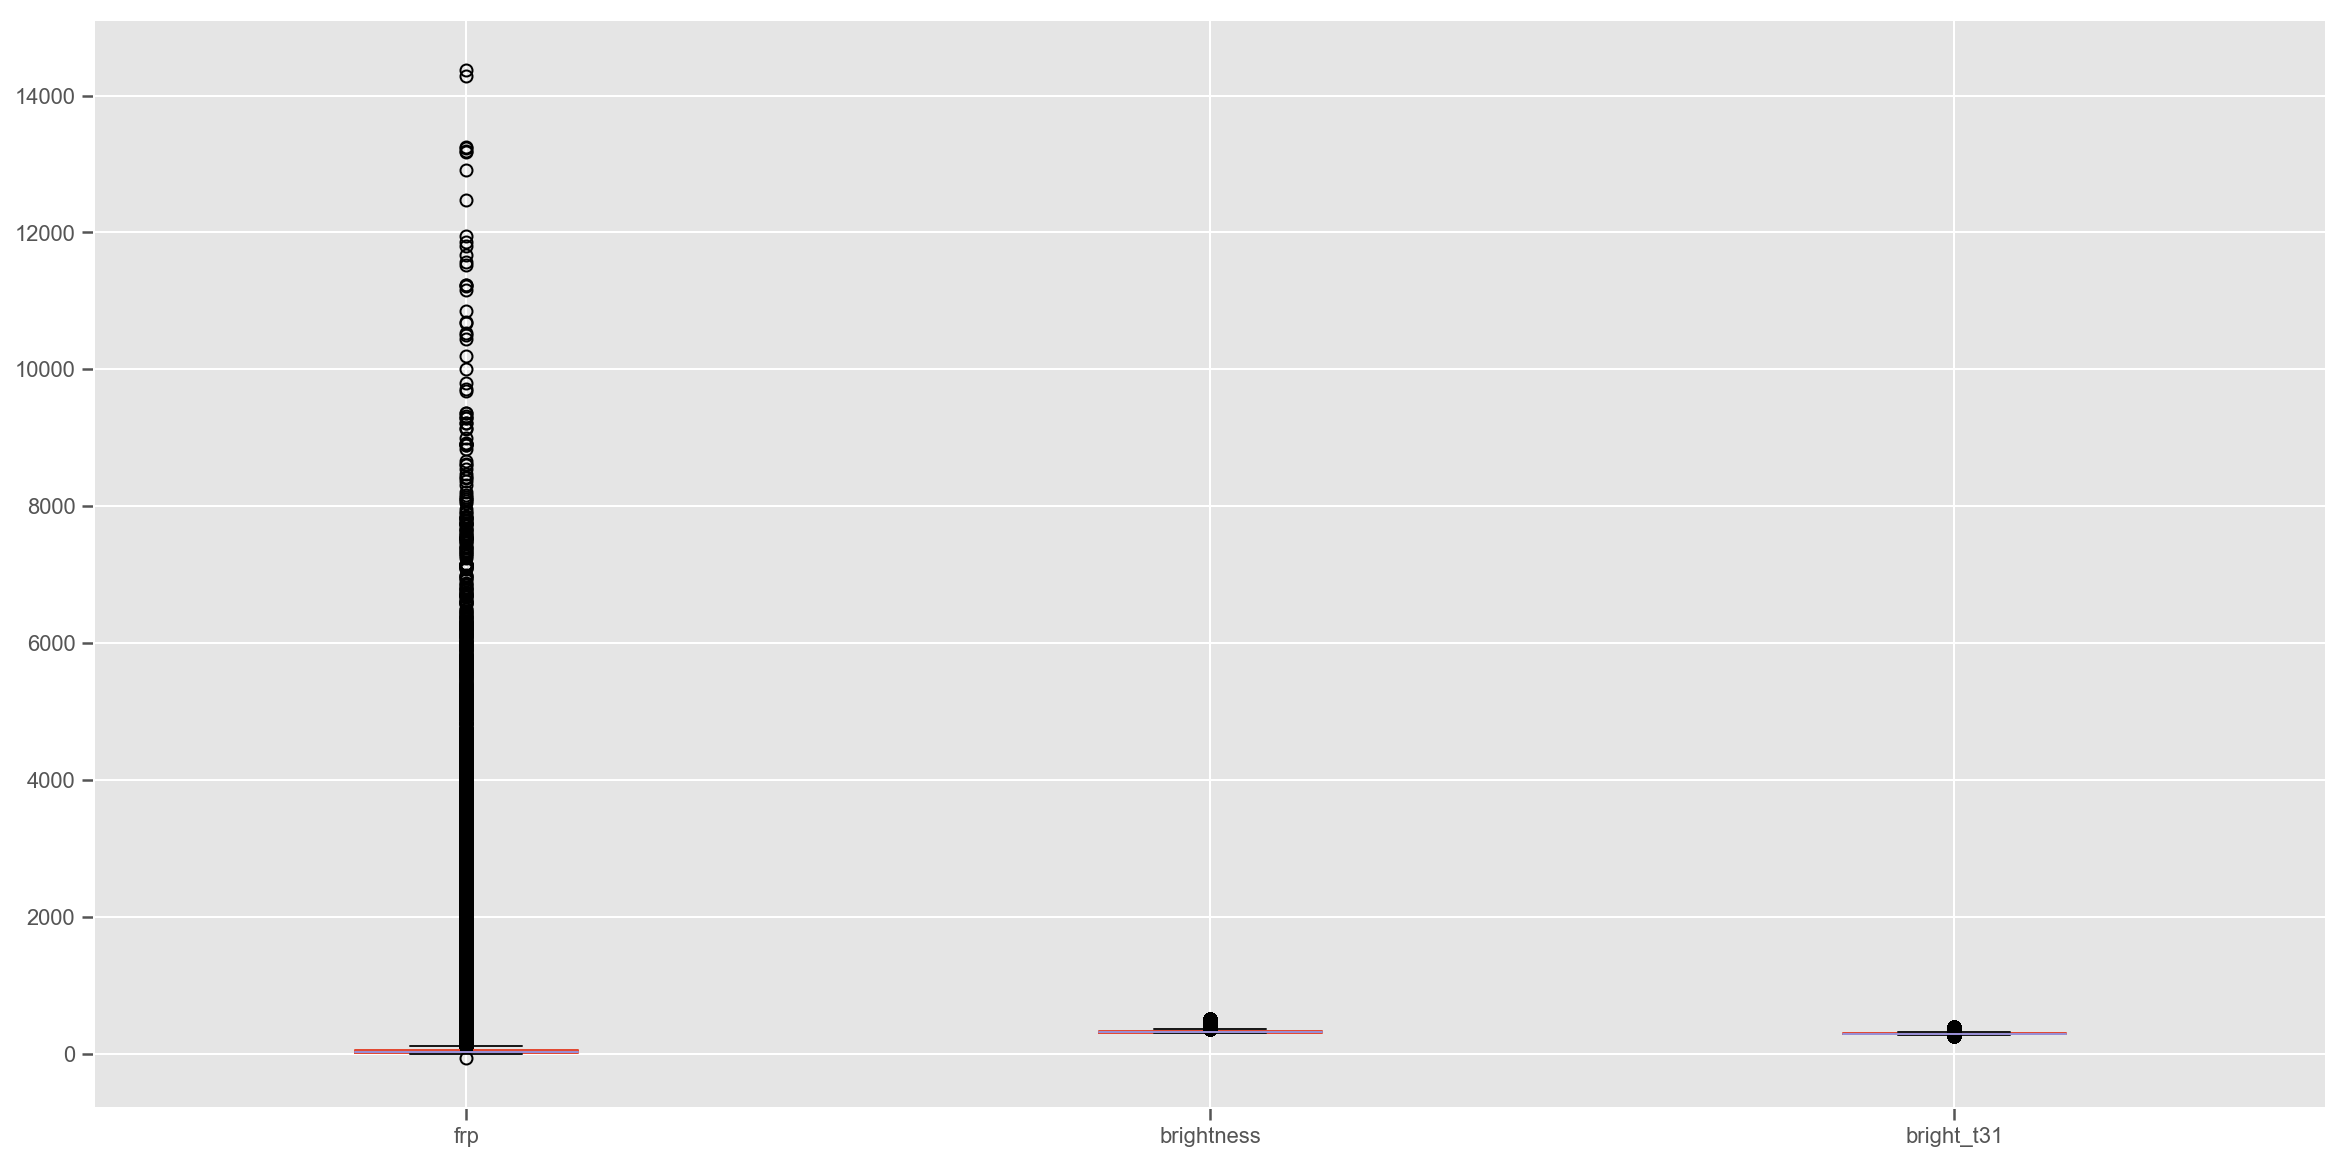

In [194]:
stl.use('ggplot')
selected_M6df.plot(kind='box',figsize=(20,10))

### <font color="#C71585"> Boxplot and Histogram of FRP and Brightness (Normalized)  </font>
### Boxplot and Histogram of FRP and Brightness (Normalized)

In [203]:
# Normalize the skewed FRP and Brightness
x1_array = np.array(M6df['frp'])
x2_array = np.array(M6df['brightness'])
normalized_X1 = preprocessing.normalize([x1_array])
normalized_X2 = preprocessing.normalize([x2_array])

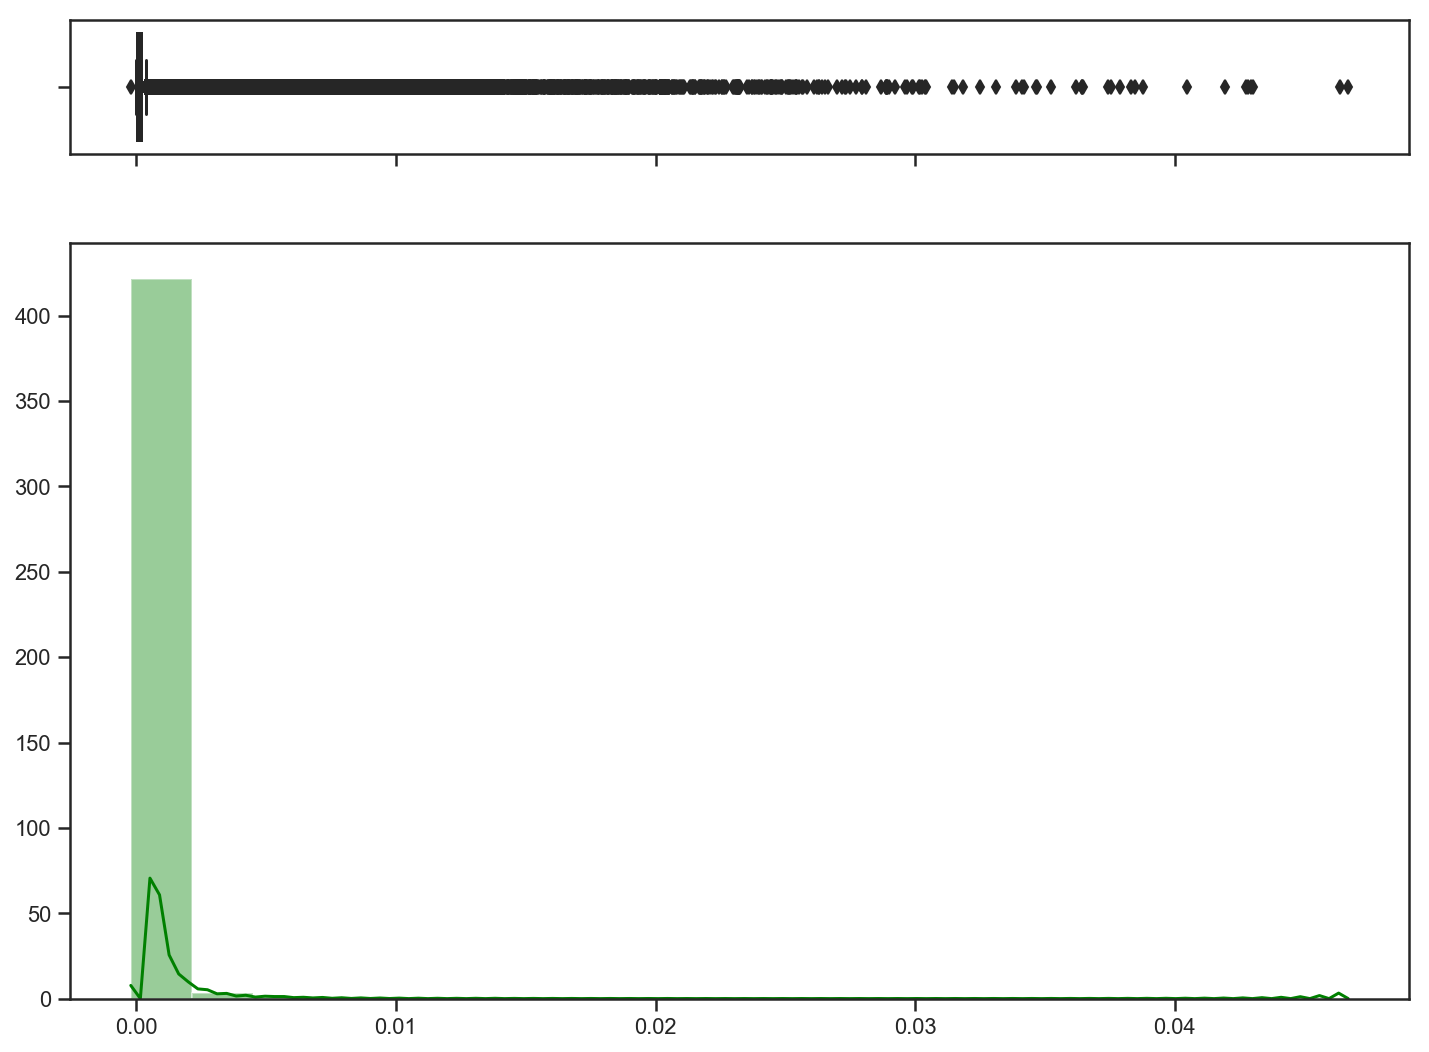

In [213]:
# Cut the plot window into 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12, 9),
                                    gridspec_kw={"height_ratios": (.15, .85)})

# TODO: Add a boxplot and a distplot. Set the number of bins on the distplot to 20.

sns.boxplot(normalized_X1, ax = ax_box, color='green')
sns.distplot(normalized_X1, ax = ax_hist, bins=20, color='green')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.show()

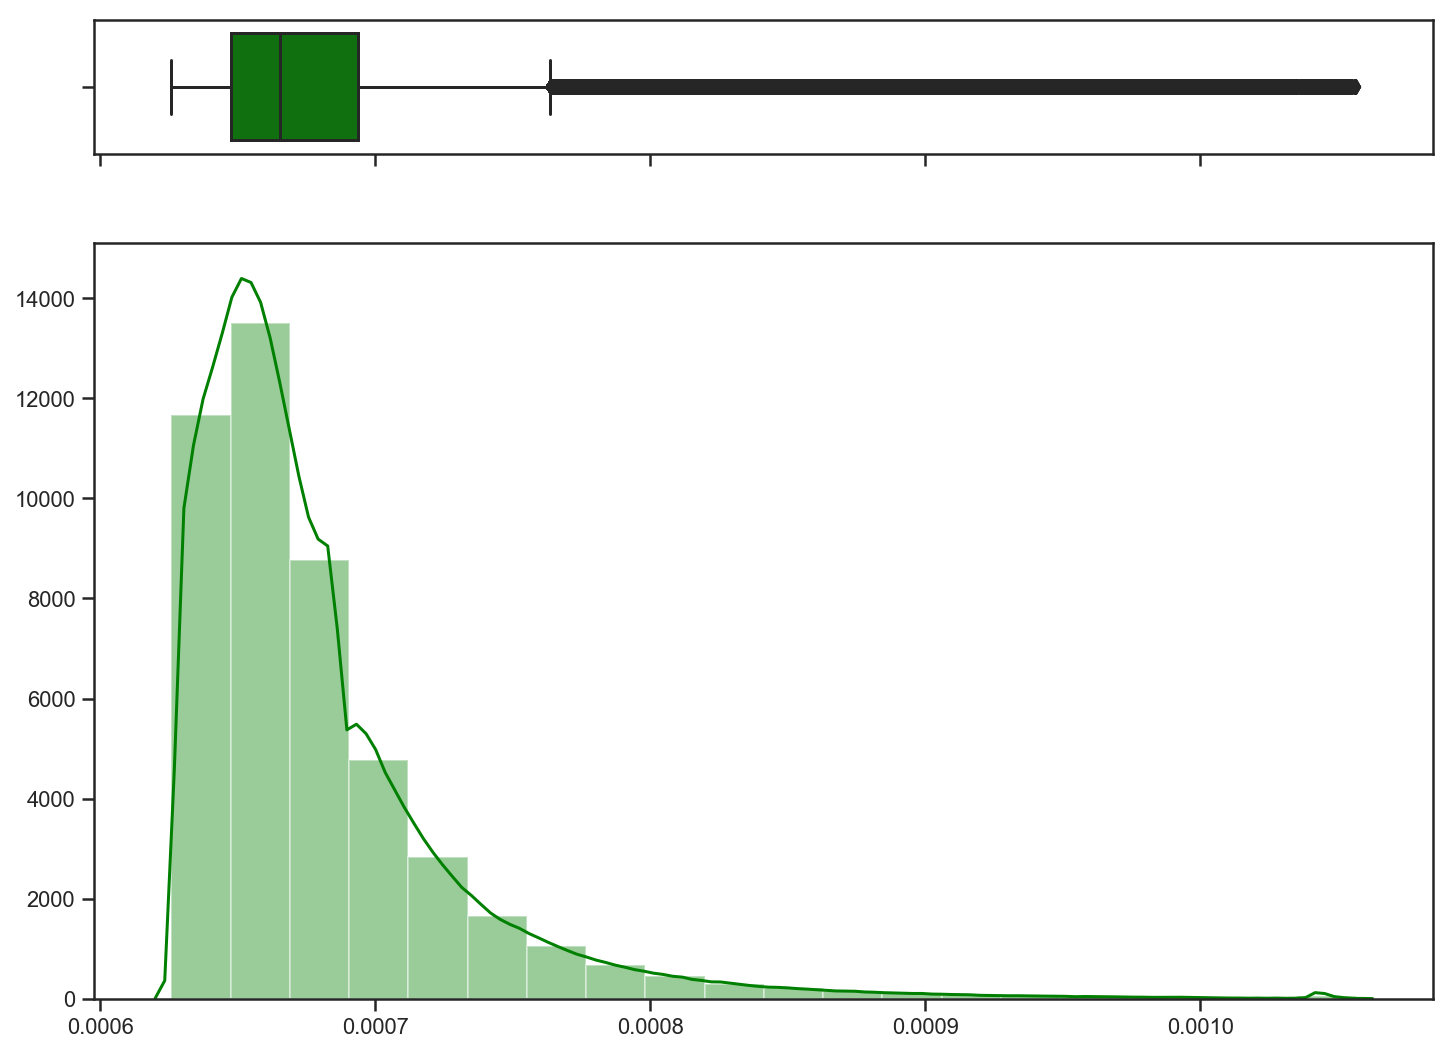

In [214]:
# Cut the plot window into 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12, 9),
                                    gridspec_kw={"height_ratios": (.15, .85)})
 
# TODO: Add a boxplot and a distplot. Set the number of bins on the distplot to 20.

sns.boxplot(normalized_X2, ax = ax_box, color='green')
sns.distplot(normalized_X2, ax = ax_hist, bins=20, color='green')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

### <font color="#C71585"> Interactive heatmap of Fire Intensity across the United States  </font>
### Interactive heatmap of Fire Intensity across the United States

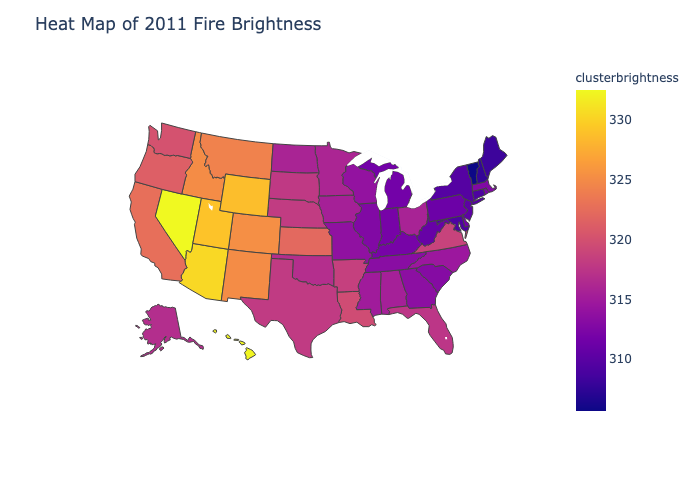

In [7]:
# Heat map of Radiation on States

import plotly.express as px  # Be sure to import express
import plotly.io as pio
from IPython.display import Image

fig = px.choropleth(NASAgroupedUSDA,  # Input Pandas DataFrame
                    locations= "state",
                    color="clusterbrightness",  # DataFrame column with color values
                    hover_name="clusterbrightness", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Heat Map of 2011 Fire Brightness', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
#fig.show()  # Output the plot to the screen as an static image
Image(pio.to_image(fig, format='png'))

### <font color="#C71585"> Interactive heatmap of Fire Intensity across the United States  </font>
### Interactive heatmap of Fire Intensity across the United States

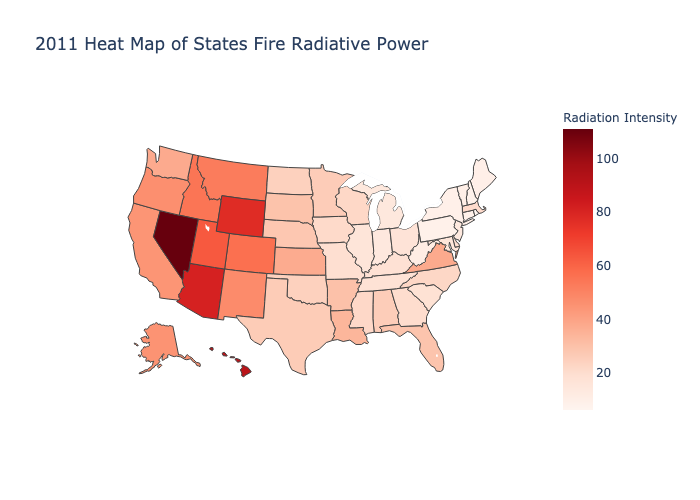

In [8]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image

fig = go.Figure(data=go.Choropleth(
    locations=NASAgroupedUSDA['state'], # Spatial coordinates
    z = NASAgroupedUSDA['clusterfrp'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Radiation Intensity",
))

fig.update_layout(
    title_text = '2011 Heat Map of States Fire Radiative Power',
    geo_scope='usa', # limite map scope to USA
)

#fig.show()   # Instead of showing the image, convert it to a static image
Image(pio.to_image(fig, format='png'))

### <font color="#C71585"> Correlation Analysis of Fire Intensity and Fire Size  </font>
### Correlation Analysis of Fire Intensity and Fire Size 

In [46]:
NASAgroupedUSDA.head(3)

,state,cluster_index,clusteryear,clusterdoy,clusterlat,clusterlog,clusterfrp,clusterbrightness,distance,resultrow,targetlat,targetlong,firesize,fire_year,discovery_doy,contain_doy
0,AK,14272.333333,2011.0,157.060606,63.771773,-148.235758,101.230303,323.512121,0.124564,14982.969697,63.791397,-148.244557,4324.181818,2011.0,155.969697,179.551724
1,AL,10354.488166,2011.0,150.693294,32.465490,-86.738769,22.658383,315.440927,0.135481,48310.923077,32.459761,-86.716348,33.429753,2011.0,151.175542,150.956349
2,AR,13993.307429,2011.0,190.933714,34.485802,-92.257150,34.961943,321.737486,0.209557,47374.899429,34.504551,-92.329638,27.999154,2011.0,190.939429,190.170139


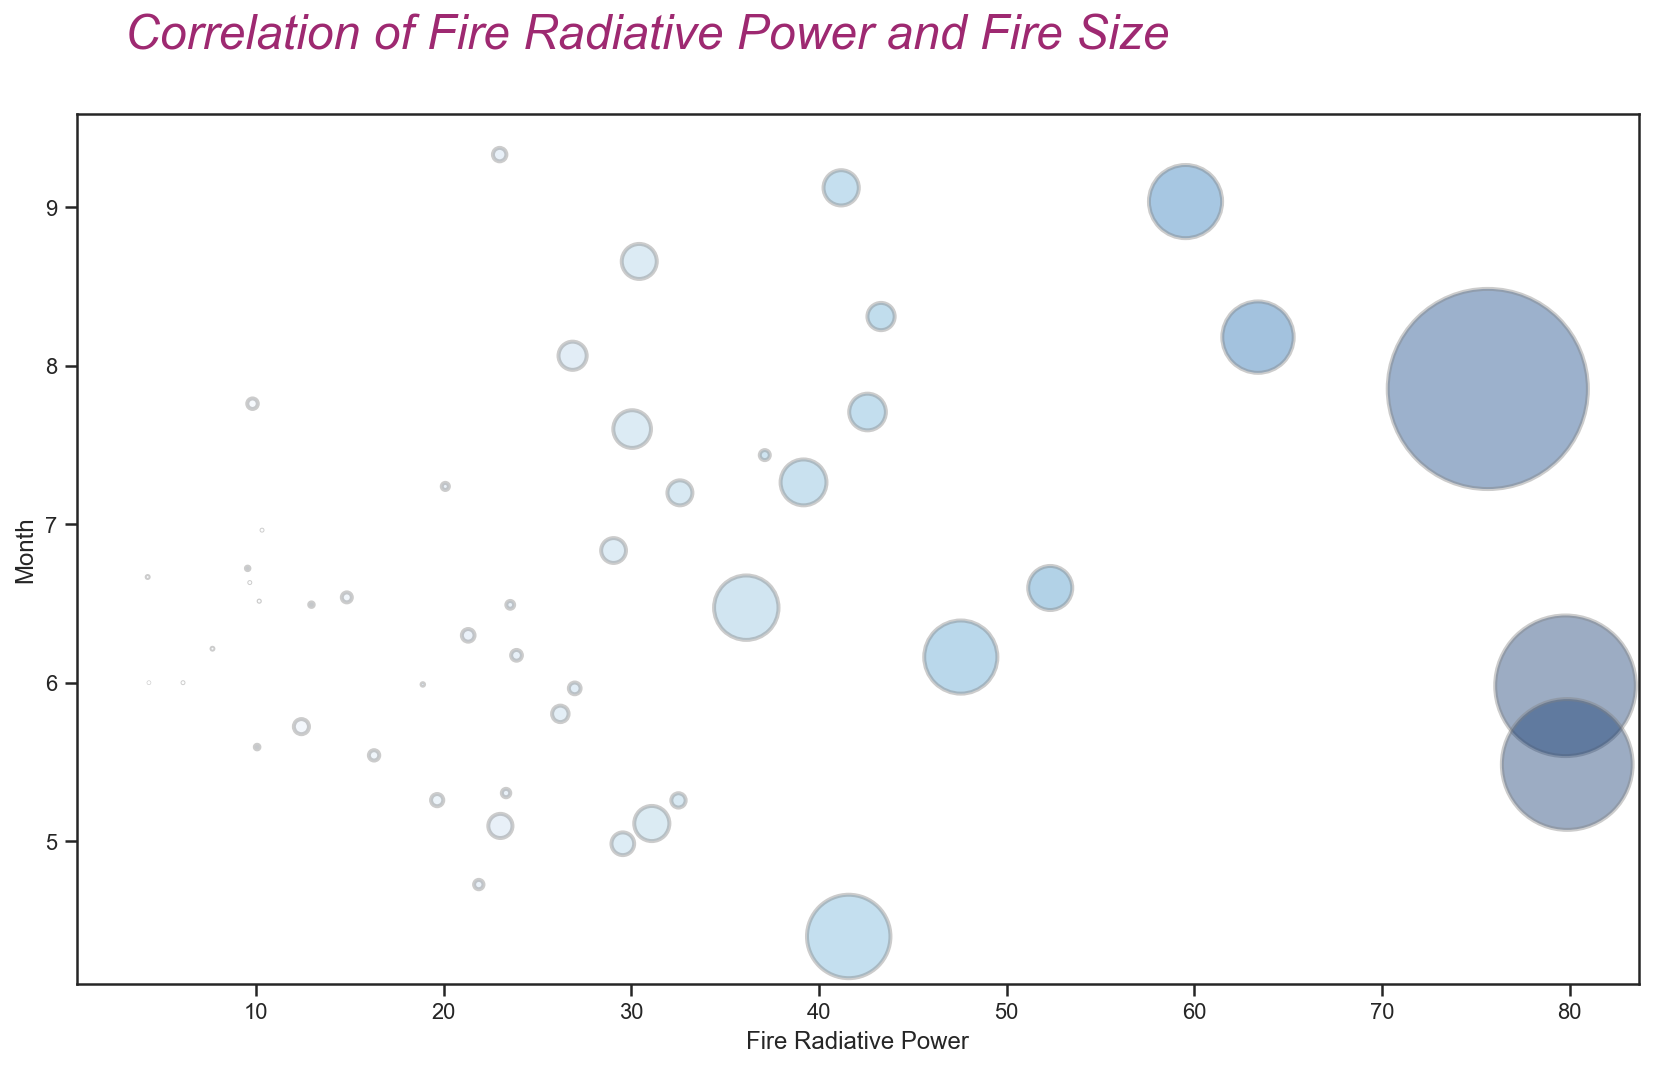

In [238]:
x = NASAgroupedUSDA['clusterfrp']
y = NASAgroupedUSDA['clustermonth']
z = NASAgroupedUSDA['firesize']
# Change color with c and alpha. I map the color to the X axis value.
plt.figure(figsize=(14, 8))
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Fire Radiative Power")
plt.ylabel("Month")
plt.text(3,10,"Correlation of Fire Radiative Power and Fire Size", fontsize = 24, color='#9E2971', fontstyle='italic')
plt.show()

### <font color="#C71585"> Heatmap of Fire Intensity Seasonality  </font>
### Heatmap of Fire Intensity Seasonality

Text(2, 13, 'Fire Intensity Seasonality')

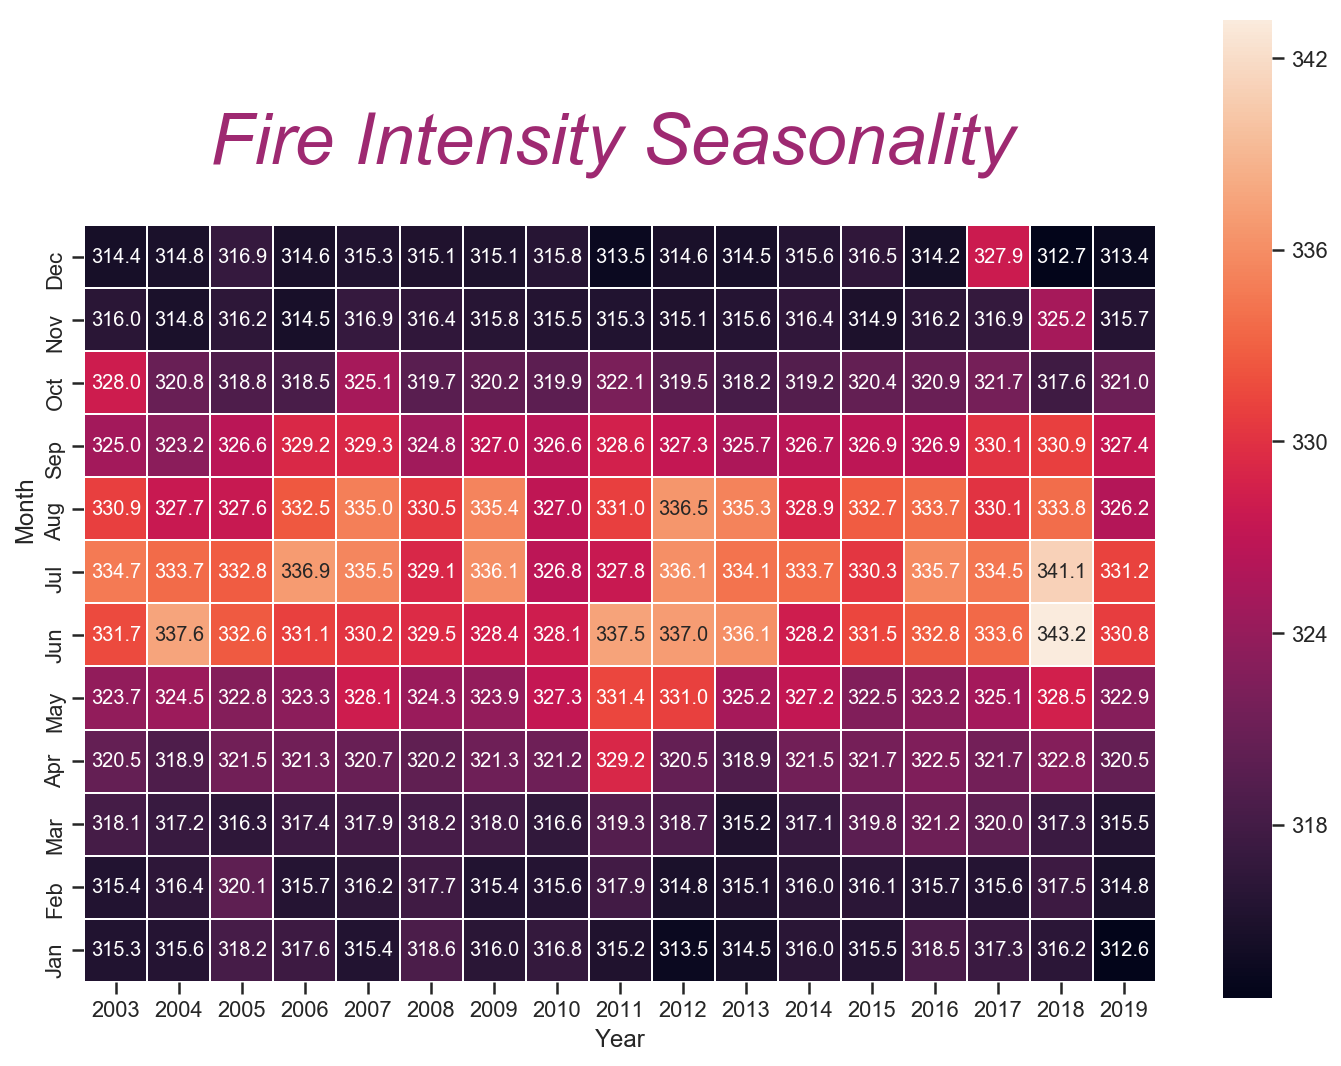

In [166]:
# Pivot from M6 DataFrame
HeatDf = M6df.pivot_table(index='month', columns='year', values='brightness')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Set lables
month_short_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticklabels=month_short_names

# Draw a heatmap with the numeric values in each cell
sns.heatmap(HeatDf, annot=True, linewidths=.5, square=True, fmt=".1f", yticklabels=month_short_names, ax=ax)
plt.xlabel('Year')
plt.ylabel('Month')
ax.set_ylim((0,15))
plt.text(2,13,"Fire Intensity Seasonality", fontsize = 36, color='#9E2971', fontstyle='italic')

### <font color="#0093bb"> TEST SECTION: More Histograms and Distributions </font>
### TEST SECTION: More Histograms and Distributions

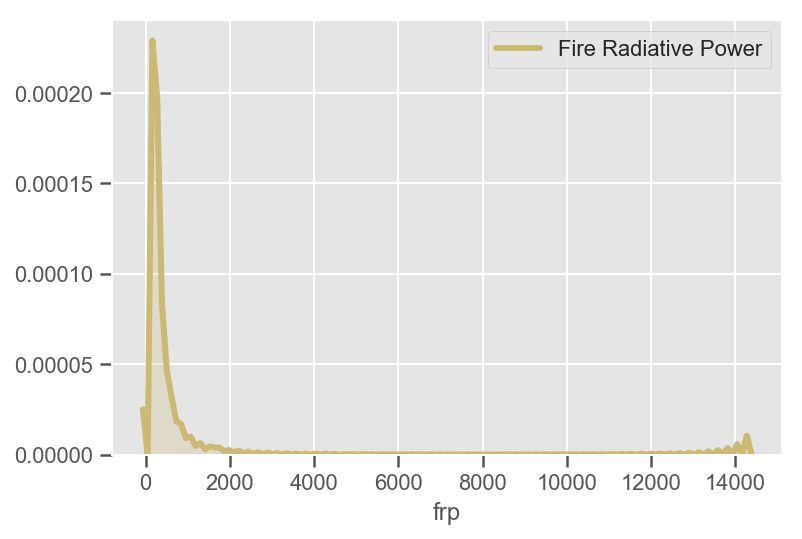

In [195]:
# FRP distribution histogram
g = sns.distplot(M6df['frp'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'Y'}, 
                  label = 'Fire Radiative Power')

Text(0, 0.5, '# of Fire Instances')

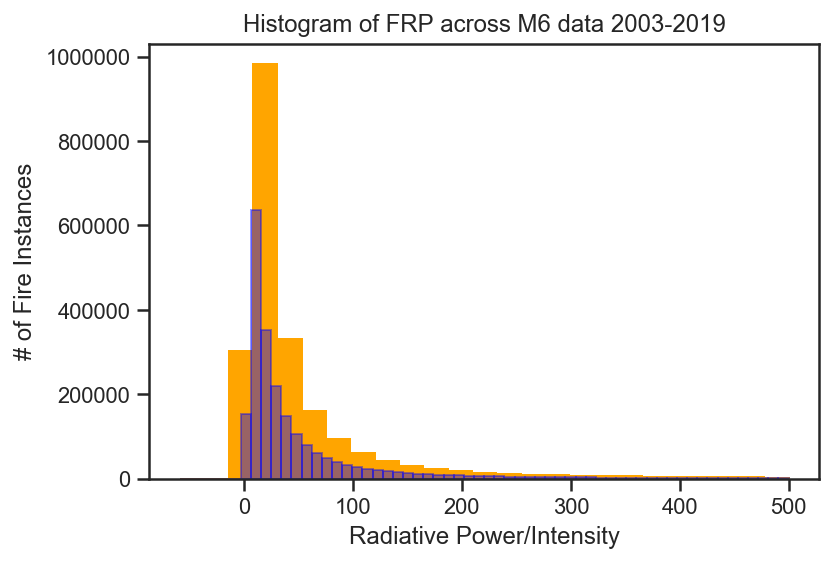

In [32]:
# matplotlib histogram
plt.hist(selected_M6df['frp'], color = 'orange', edgecolor = 'orange',
         bins = int(180/7))

# seaborn histogram
sns.distplot(selected_M6df['frp'], hist=True, kde=False, 
             bins=int(180/3), color = 'blue',
             hist_kws={'edgecolor':'blue'})
# Add labels
plt.title('Histogram of FRP across M6 data 2003-2019')
plt.xlabel('Radiative Power/Intensity')
plt.ylabel('# of Fire Instances')

Text(0, 0.5, '# of Fire Instances')

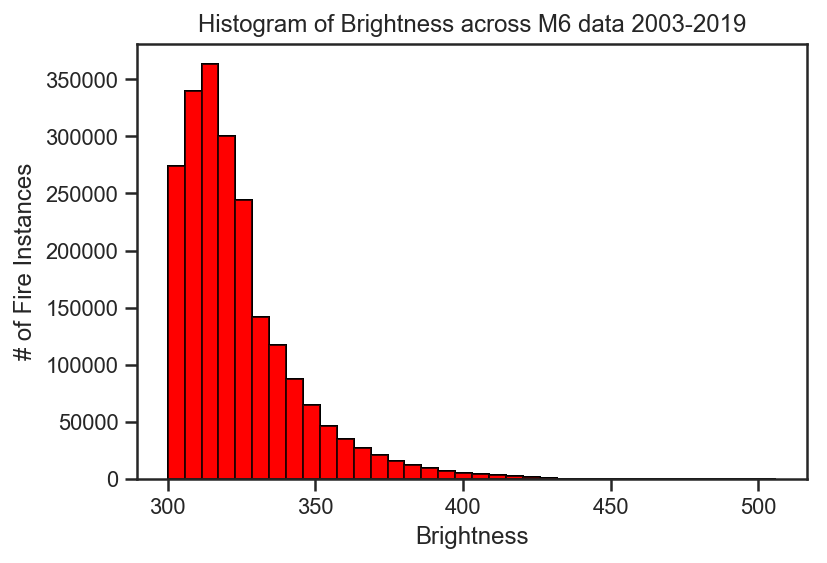

In [35]:
# matplotlib histogram
plt.hist(selected_M6df['brightness'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(selected_M6df['brightness'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Brightness across M6 data 2003-2019')
plt.xlabel('Brightness')
plt.ylabel('# of Fire Instances')

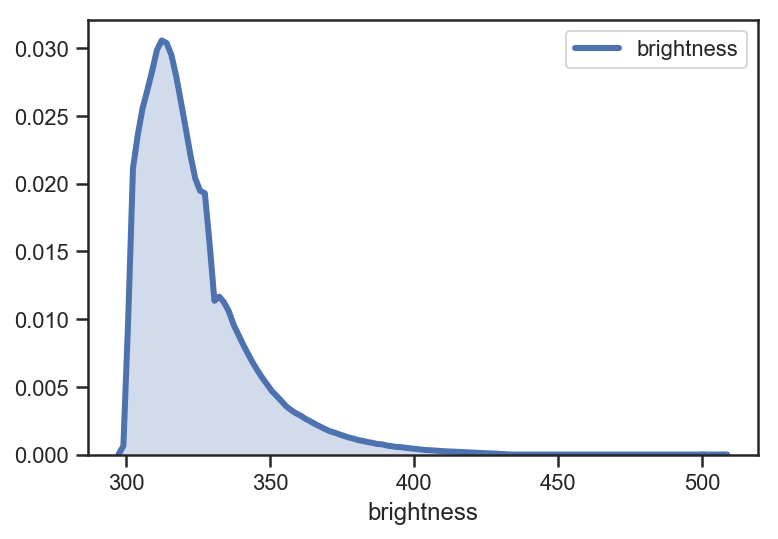

In [36]:
sns.distplot(selected_M6df['brightness'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'brightness')

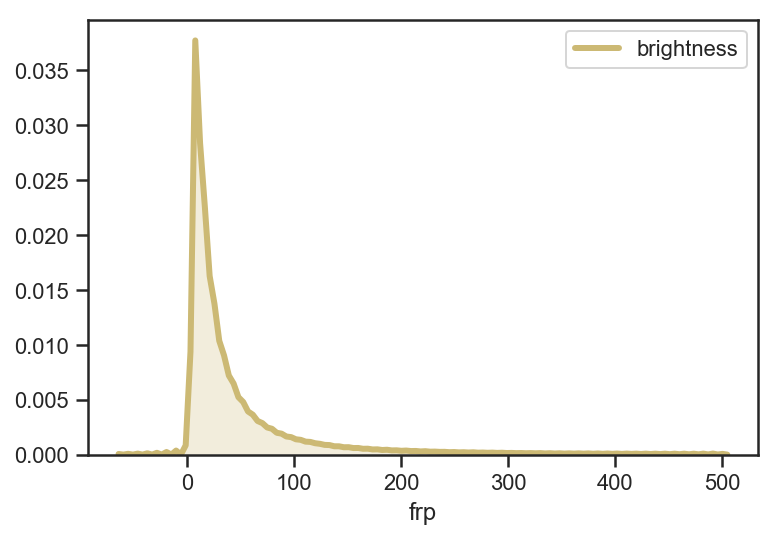

In [38]:
sns.distplot(selected_M6df['frp'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'Y'}, 
                  label = 'brightness')

In [ ]:
M6large2005.to_csv('/Users/AlfHaugen/Python/Wildfire_Data/m62005large.csv', encoding='utf-8')